## Exploratory Data Analysis

In [1]:
# Import all libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk import pos_tag

## Create data for visualization

In [2]:
def document_term_matrix(data, vectorizer):
    data_X = data['Articles']
    data_X_vec = vectorizer.fit_transform(data_X).toarray()
    data_X_vec_df = pd.DataFrame(data_X_vec, columns = vectorizer.get_feature_names())
    
    data_new = data_X_vec_df.transpose()
    data_new['Total']= data_new.sum(axis=1)
    data_sorted = data_new.sort_values(by='Total', ascending=False)
    
    return data_X_vec_df, data_sorted

## Visualize top n words

In [3]:
def create_top_words_cloud(words_sorted, n):
    top_n_words = words_sorted.head(n).index
    
    # Create word cloud.
    cloud = WordCloud()
    cloud.generate(' '.join(word for word in top_n_words))
    plt.figure(figsize=(15,7))
    plt.title('Word Cloud: Top {} Words:'.format(n))
    plt.imshow(cloud, interpolation = 'bilinear')
    plt.show()  

In [4]:
def create_top_words_distribution_plot(words_sorted, n):
    top_n_words = words_sorted.head(n).index
    top_n_words_count = words_sorted['Total'].head(n)
    
    # Create distribution plot.
    plt.figure(figsize=(15,7))
    plt.title('Distribution Plot Top {} Words:'.format(n))
    plt.bar(top_n_words, top_n_words_count)
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.show()

## Import data

In [59]:
data = pd. read_csv('train_spam_processed_pos.csv')

## Word Cloud from data

In [60]:
count_vec = CountVectorizer(analyzer='word')

# count_vec = CountVectorizer(analyzer='word', min_df=0.10, max_df=0.50)

In [61]:
word_vec, words_sorted = document_term_matrix(data, count_vec)

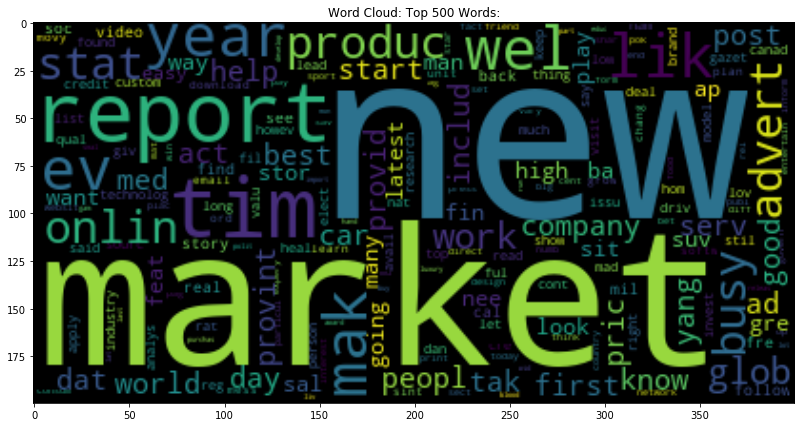

In [62]:
create_top_words_cloud(words_sorted, 500)

## Visualize top n single words

In [63]:
count_vec = CountVectorizer(analyzer='word')
# count_vec = CountVectorizer(analyzer='word', min_df=0.10, max_df=0.50)

In [64]:
word_vec, words_sorted = document_term_matrix(data, count_vec)

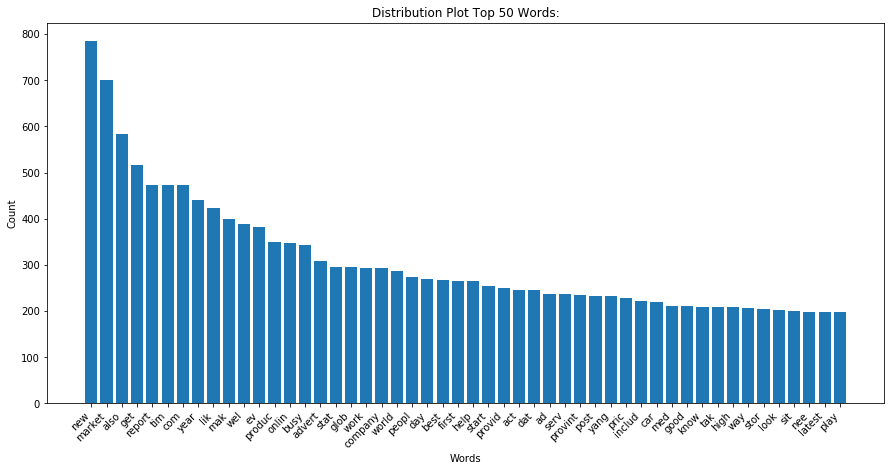

In [65]:
create_top_words_distribution_plot(words_sorted, 50)

## Visualization top n two words

In [66]:
count_vec = CountVectorizer(analyzer='word', ngram_range=(2,2))
# count_vec = CountVectorizer(analyzer='word', min_df=0.10, max_df=0.50, ngram_range=(2,2))

In [67]:
word_vec, words_sorted = document_term_matrix(data, count_vec)

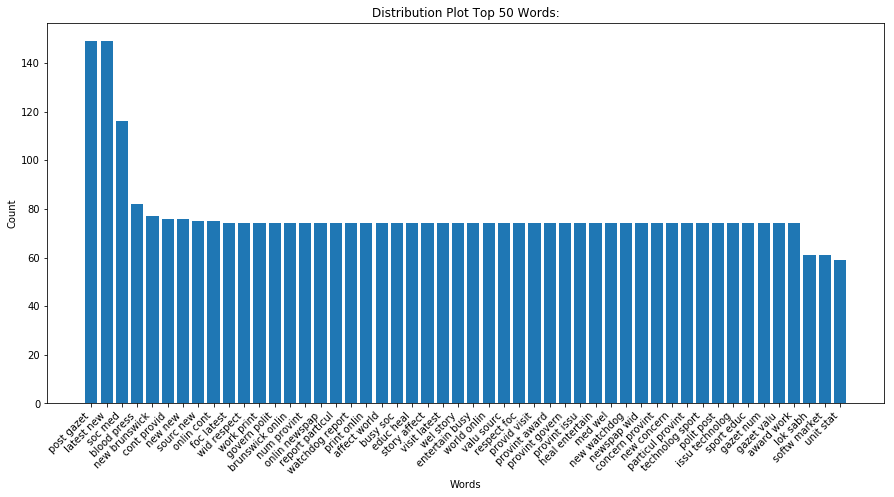

In [68]:
create_top_words_distribution_plot(words_sorted, 50)

## Visualization top n three words

In [69]:
count_vec = CountVectorizer(analyzer='word', ngram_range=(3,3))
# count_vec = CountVectorizer(analyzer='word', min_df=0.10, max_df=0.50, ngram_range=(3,3))

In [70]:
word_vec, words_sorted = document_term_matrix(data, count_vec)

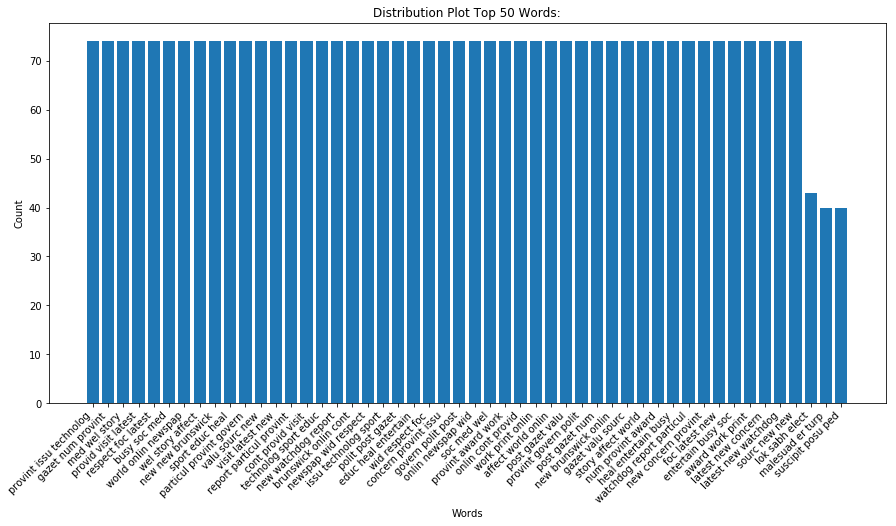

In [71]:
create_top_words_distribution_plot(words_sorted, 50)